<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220314_%EB%B6%84%EB%A5%98_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1번

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)       #하단 오류 발생 방지 코드

X.shape, y.shape

((70000, 784), (70000,))

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
param_grid = {'weights':['uniform', 'distance'],
              'n_neighbors':[3, 5, 7]}
gcv = GridSearchCV(knn_clf, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, refit=True)
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)
print('best score', gcv.best_score_)
#knn_clf.fit(X_train, y_multilabel)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


final params {'n_neighbors': 3, 'weights': 'distance'}
best score 0.96625


In [43]:
from sklearn.metrics import accuracy_score

y_pred = gcv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9717

#2번

In [1]:
from scipy.ndimage.interpolation import shift

def shift_img(img, dx, dy):
    img = img.reshape((28, 28))
    shifted_img = shift(img, [dy, dx], cval=0)
    return shifted_img.reshape([-1])

In [8]:
image = X_train.values[1000]
image_down = shift_img(image, 0, 5)
image_left = shift_img(image, -5, 0)

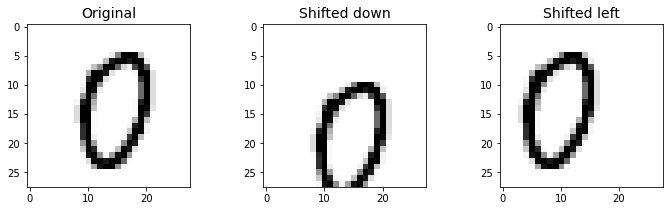

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [29]:
type(shift_img(X_train.values[0], 0, 0))

numpy.ndarray

In [34]:
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train):
        X_train_augmented.append(shift_img(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [38]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [37]:
knn_clf = KNeighborsClassifier(**gcv.best_params_)

In [39]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [42]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9763